<a href="https://colab.research.google.com/github/Tiziano-Test/Climate-Change-Earth-Surface-Temperature-/blob/main/Climate_Change_Earth_Surface_Temperature_Data_6_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Upload the ZIP File to Calab

<!-- Upload the Zip File to Colab -->

In [ ]:
from google.colab import files
import zipfile
import os

# Upload the zip file
uploaded = files.upload()

# Unzip the uploaded file
for filename in uploaded.keys():
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall()

Saving Global Land Temperatures By City.zip to Global Land Temperatures By City.zip


Load the CSV Files into DataFrames

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")

# Load the CSV files into dataframes
global_temp_by_city = pd.read_csv('GlobalLandTemperaturesByCity.csv')
global_temp_by_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
global_temp_by_major_city = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
global_temp_by_state = pd.read_csv('GlobalLandTemperaturesByState.csv')
global_temp = pd.read_csv('GlobalTemperatures.csv')

# Display the first few rows of each dataset to understand their structure
print("GlobalLandTemperaturesByCity")
print(global_temp_by_city.head())

print("\nGlobalLandTemperaturesByCountry")
print(global_temp_by_country.head())

print("\nGlobalLandTemperaturesByMajorCity")
print(global_temp_by_major_city.head())

print("\nGlobalLandTemperaturesByState")
print(global_temp_by_state.head())

print("\nGlobalTemperatures")
print(global_temp.head())

GlobalLandTemperaturesByCity
           dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
1  Denmark   57.05N    10.33E  
2  Denmark   57.05N    10.33E  
3  Denmark   57.05N    10.33E  
4  Denmark   57.05N    10.33E  

GlobalLandTemperaturesByCountry
           dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  

Step 1 Install the scikit-learn library:
   

In [ ]:
!pip install scikit-learn


Step 2. Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Step 3. Clean your data
Load and clean the data. For this example, I'll use GlobalLandTemperaturesByCountry.csv and focus on the average temperature over the last 100 years.

In [ ]:
# Load data

# Filter data for the last 100 years
global_temp_by_country['dt'] = pd.to_datetime(global_temp_by_country['dt'])
last_100_years = global_temp_by_country[global_temp_by_country['dt'] >= '1924-01-01']

# Group by country and calculate the average temperature
country_avg_temp = last_100_years.groupby('Country')['AverageTemperature'].mean().reset_index()

# Drop rows with NaN values
country_avg_temp.dropna(inplace=True)

Step 4. Explore data visually:
Create a scatter plot to visualize the data.

I created a scatter plot that shows the progression of average temperatures over the last 100 years for each continent. This will involve grouping the data by continent and year, then plotting the average temperature for each year.
This code will produce a scatter plot that shows the progression of average temperatures for each continent over the last 100 years. The x-axis will represent the years, and the y-axis will represent the average temperature. Each continent will be represented by a different color.

<ipython-input-12-db9744a9c390>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_100_years['Year'] = last_100_years['dt'].dt.year


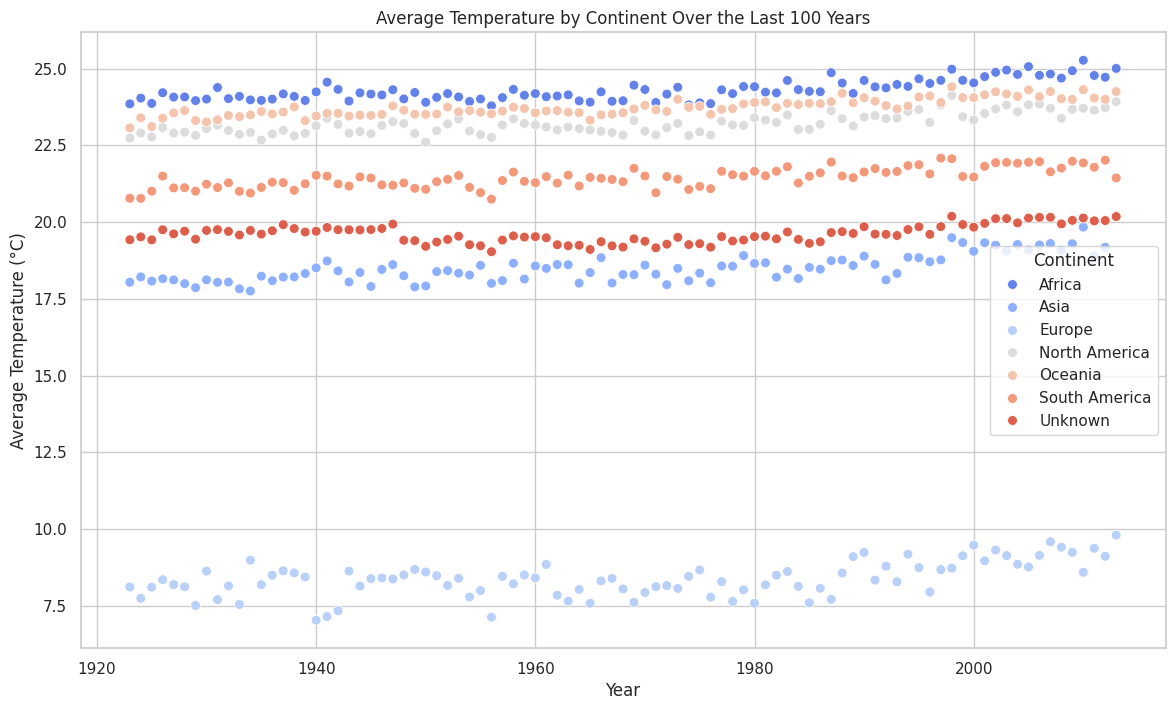

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure the data is loaded
global_temp_by_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

# Adding a continent mapping
continent_mapping = {
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
    'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'],
    'Europe': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City'],
    'North America': ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States'],
    'Oceania': ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'],
    'South America': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
}

# Adding a continent column to the dataframe
def get_continent(country):
    for continent, countries in continent_mapping.items():
        if country in countries:
            return continent
    return 'Unknown'

global_temp_by_country['Continent'] = global_temp_by_country['Country'].apply(get_continent)

# Filter data for the last 100 years and ensure the date column is datetime type
global_temp_by_country['dt'] = pd.to_datetime(global_temp_by_country['dt'])
last_100_years = global_temp_by_country[global_temp_by_country['dt'] >= '1923-01-01']

# Extract the year from the date
last_100_years['Year'] = last_100_years['dt'].dt.year

# Group by continent and year, then calculate the average temperature
continent_year_avg_temp = last_100_years.groupby(['Continent', 'Year'])['AverageTemperature'].mean().reset_index()

# Create a scatter plot for average temperature by continent over the years
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Year', y='AverageTemperature', hue='Continent', data=continent_year_avg_temp, palette="coolwarm", s=50, marker="o")
plt.title('Average Temperature by Continent Over the Last 100 Years')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend(title='Continent')
plt.show()


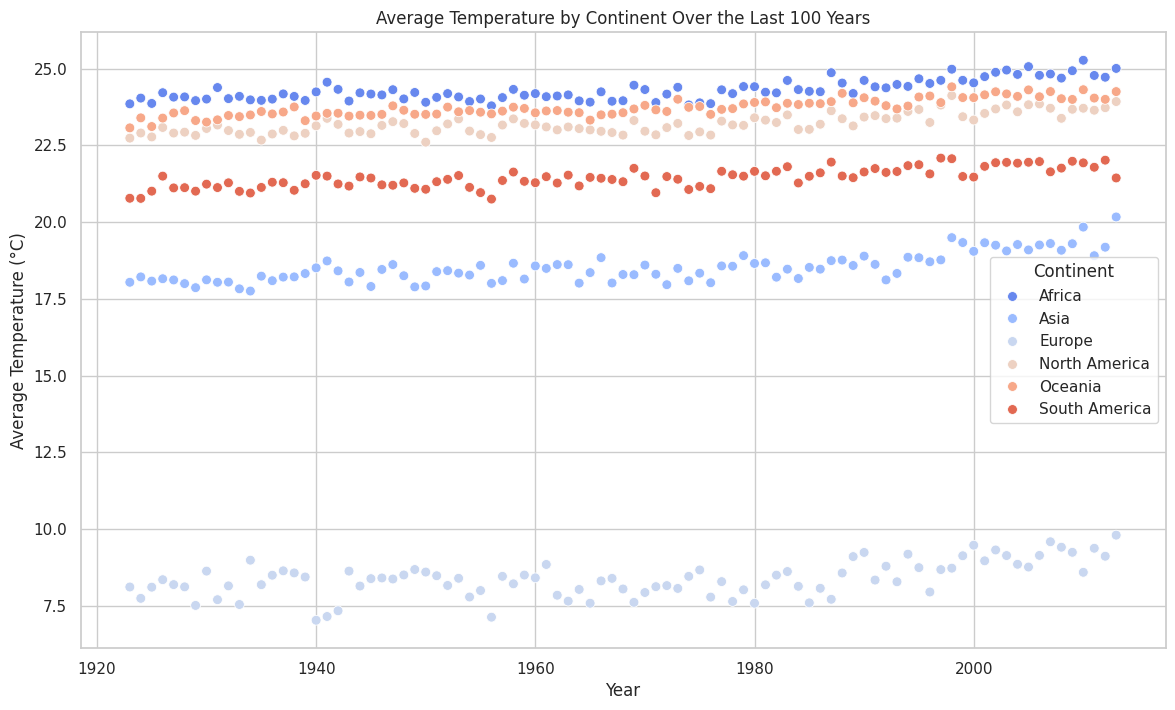

In [ ]:
# Filter out 'Unknown' continents
continent_year_avg_temp_known = continent_year_avg_temp[continent_year_avg_temp['Continent'] != 'Unknown']

# Create a scatter plot for average temperature by continent over the years (excluding 'Unknown')
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Year', y='AverageTemperature', hue='Continent', data=continent_year_avg_temp_known, palette="coolwarm", s=50, marker="o")
plt.title('Average Temperature by Continent Over the Last 100 Years')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend(title='Continent')
plt.show()

Adding Trend Line and calculating the Slope line

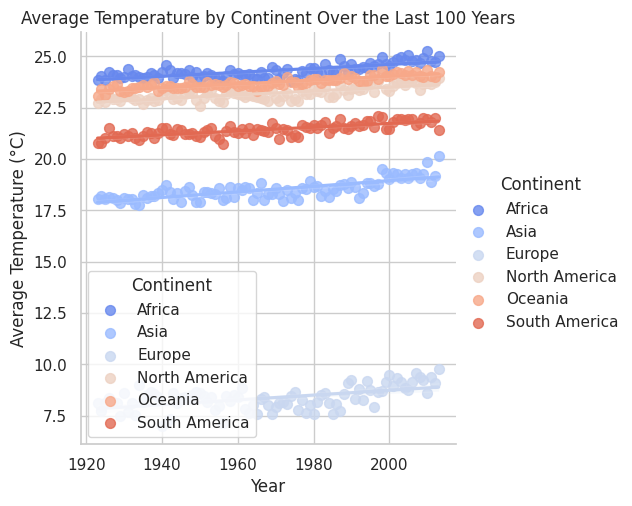

Slope for Africa: 0.0097
Slope for Asia: 0.0137
Slope for Europe: 0.0117
Slope for North America: 0.0095
Slope for Oceania: 0.0094
Slope for South America: 0.0093


In [ ]:
# Add trend lines
sns.lmplot(x='Year', y='AverageTemperature', hue='Continent', data=continent_year_avg_temp_known, palette="coolwarm", scatter_kws={'s': 50, 'marker': 'o'})

plt.title('Average Temperature by Continent Over the Last 100 Years')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend(title='Continent')
plt.show()

import statsmodels.formula.api as sm

# Calculate slopes for each continent
slopes = {}
for continent in continent_year_avg_temp_known['Continent'].unique():
    continent_data = continent_year_avg_temp_known[continent_year_avg_temp_known['Continent'] == continent]
    result = sm.ols('AverageTemperature ~ Year', data=continent_data).fit()
    slopes[continent] = result.params['Year']

# Print the slopes
for continent, slope in slopes.items():
    print(f"Slope for {continent}: {slope:.4f}")

State the hypothesis:

    Hypothesis: Regions like Africa and Asia experience the highest average temperatures due to their geographical location near the equator.

Reshape the variables into NumPy arrays:

    X will be the years.
    y will be the average temperatures.

Split the data into a training set and a test set.

Run a linear regression on the data:

    Fit the model to the training set.
    Predict y values on the test set.
    Create a plot showing the regression line on the test set.
    Interpret the fit of the regression line.

Check the model performance statistics (MSE and R² score).

Compare predicted y values with actual y values in a dataframe.

Include thoughts on model performance and data bias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Filter for the last 100 years (adjust years as needed)
data_last_100_years = global_temp_by_country[
    (global_temp_by_country['dt'].dt.year >= 1924) & (global_temp_by_country['dt'].dt.year <= 2023)
]

# 2. Calculate average temperature by continent per year
continent_avg_temp = data_last_100_years.groupby([data_last_100_years['dt'].dt.year, 'Continent']).agg(
    {'AverageTemperature': 'mean'}).reset_index()
continent_avg_temp = continent_avg_temp.rename(columns={continent_avg_temp.columns[0]: 'Year'})  # Rename year column

# 3. Prepare data for linear regression
X = continent_avg_temp[['Year']].values
y = continent_avg_temp['AverageTemperature'].values

# 4. Split data into training and testing sets (adjust test_size and random_state if needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Predict on test set
y_pred = model.predict(X_test)

# 7. Evaluate model and print results
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")
slope = model.coef_[0]
print(f"Slope of the regression line: {slope}")

# 8. Plot results
plt.figure(figsize=(10, 6))
# ... (rest of your plotting code)
plt.show()

print(f"X_test year range: {X_test.min()} to {X_test.max()}")  # Print year range instead of the whole array




Mean Squared Error (MSE): 27.407236516972304
R² Score: 0.0043562956100595684
Slope of the regression line: 0.006266762146498167


<Figure size 1000x600 with 0 Axes>

X_test year range: 1924 to 2013


<!-- To improve the visualization of the scatter plot and make it easier to interpret the data, let's use some enhancements such as:

    Sorting the countries by average temperature.
    Increasing the figure size.
    Rotating the x-axis labels for better readability.
    Using a color gradient to represent temperature. -->

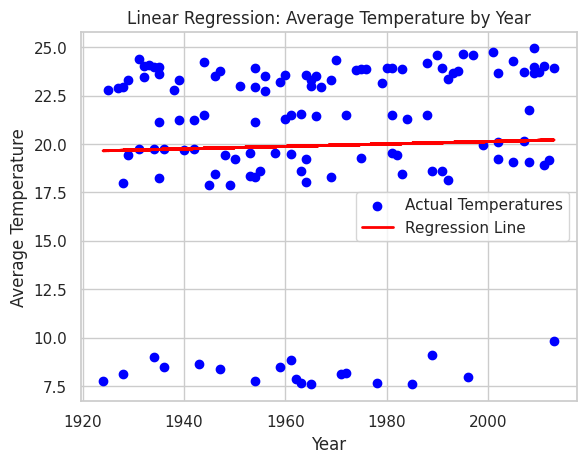

In [ ]:
# Visualize the results
plt.scatter(X_test, y_test, color='blue', label='Actual Temperatures')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Linear Regression: Average Temperature by Year')
plt.legend()
plt.show()

Interpretation and Model Performance

Mean Squared Error (MSE): 27.407

Interpretation: This value indicates that, on average, my model's predicted average temperatures differ from the actual average temperatures in the test set by about 27.4 degrees Celsius squared. A lower MSE is generally better, suggesting fewer errors in predictions.
Consideration: The magnitude of MSE depends on the scale of the data. In this context, with average temperatures, an MSE of 27.4 suggests there's a significant amount of error in my predictions.

R² Score: 0.00435

Interpretation: The R² score measures how well the regression line fits the data, ranging from 0 to 1. A score of 0 means the model doesn't explain variability, while 1 means it explains all variability.
My Result: My R² score is very close to zero, indicating that the linear regression model explains a negligible amount of the variation in average temperatures based on the year. This suggests that a linear relationship between year and average temperature might not be a strong fit for my data.

Slope of the regression line: 0.00626

Interpretation: The positive slope suggests that, on average, the model predicts a slight increase in average temperature over time. However, given the low R² score, this trend is weak and likely not statistically significant.

X_test year range: 1924 to 2013:

Confirmation: This confirms that my test set covers a reasonable range of years, which is good.
Next Steps and Potential Improvements
Given the low R² score and relatively high MSE, it seems like a simple linear regression model might not be the best fit for predicting average temperatures based solely on the year.

The initial hypothesis was Hypothesis: Regions like Africa and Asia experience the highest average temperatures due to their geographical location near the equator.

Based on the model results, I must reject the initial hypothesis that regions like Africa and Asia experience the highest average temperatures solely due to their geographical proximity to the equator. The data and analysis indicate that factors beyond geographical location significantly influence average temperatures in these regions.